# GNN Explainer

This notebook is designed to visualize the results of the GNN Explainer.

In [1]:
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

Configuring the experiment you want to visualize. These values should match the configuration:

> TODO: Unify configuration of experiments in yaml

In [2]:
logdir = '.../log'
expdir = '...'

In [3]:
# Load the produced masks

In [4]:
dirs = os.listdir(os.path.join(logdir, expdir))
dirs

['events.out.tfevents.1638802336.DESKTOP-TKOLUTM',
 'events.out.tfevents.1638806091.DESKTOP-TKOLUTM',
 'events.out.tfevents.1638808491.DESKTOP-TKOLUTM',
 'events.out.tfevents.1638809110.DESKTOP-TKOLUTM',
 'events.out.tfevents.1638809157.DESKTOP-TKOLUTM',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_400graph_idx_-1.npy',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_400graph_idx_-1.npy-filt-.json',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_405graph_idx_-1.npy',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_410graph_idx_-1.npy',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_415graph_idx_-1.npy',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_420graph_idx_-1.npy',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_425graph_idx_-1.npy',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_430graph_idx_-1.npy',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_435graph_idx_-1.npy',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_440graph_idx_-1.npy',
 'masked_adj_syn1_base_h20_o20_explainnode_i

In [5]:
masks = []
# This would print all the files and directories
for file in dirs:
    if file.split('.')[-1] == 'npy':
        print(file)
        masks.append(file)

masked_adj_syn1_base_h20_o20_explainnode_idx_400graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_405graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_410graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_415graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_420graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_425graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_430graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_435graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_440graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_445graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_450graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_455graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_460graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_465graph_idx_-1.npy
masked_adj_syn1_base_h20_o20_explainnode_idx_470graph_idx_-1.npy
masked_adj_syn1_base_h20_

In [6]:
def show_adjacency_full(mask, ax=None):
    adj = np.load(os.path.join(logdir, expdir, mask), allow_pickle=True)
    if ax is None:
        plt.figure()
        plt.imshow(adj);
    else:
        ax.imshow(adj)
    return adj

In [7]:
def filter_adj(adj):
    filt_adj = adj.copy()
    filt_adj[adj<0.8] = 0
    return filt_adj

<ipython-input-8-f6c2fa3731a8>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))


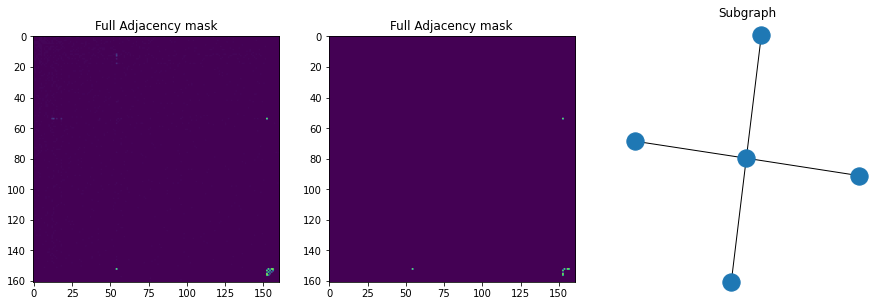

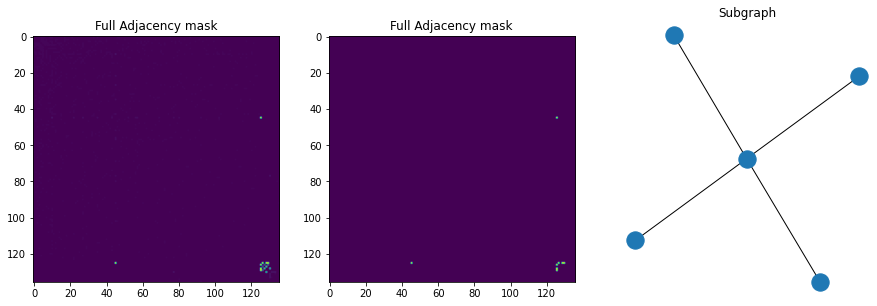

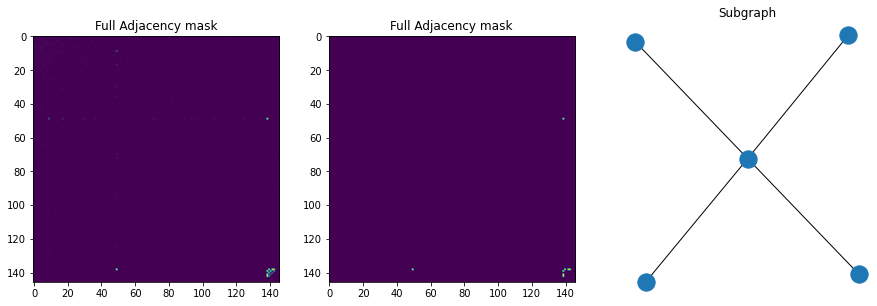

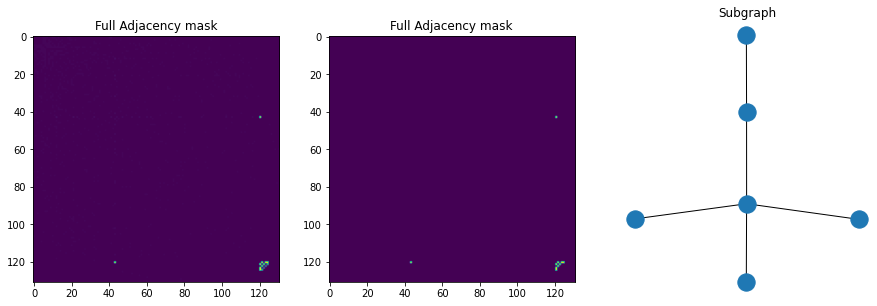

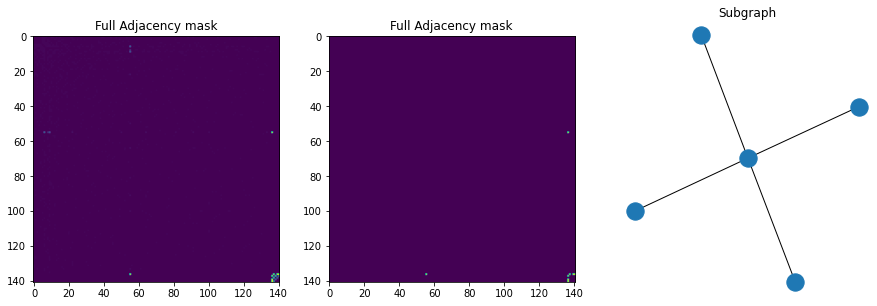

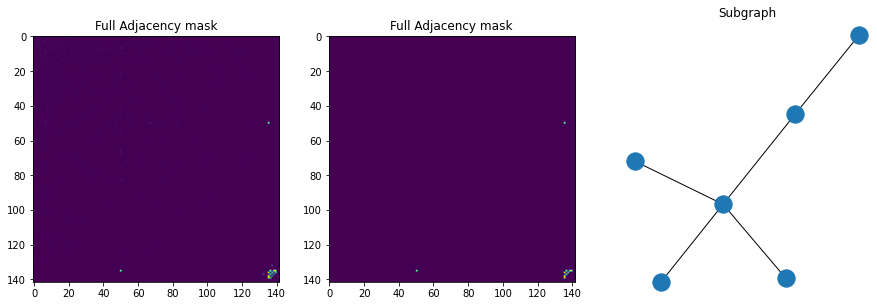

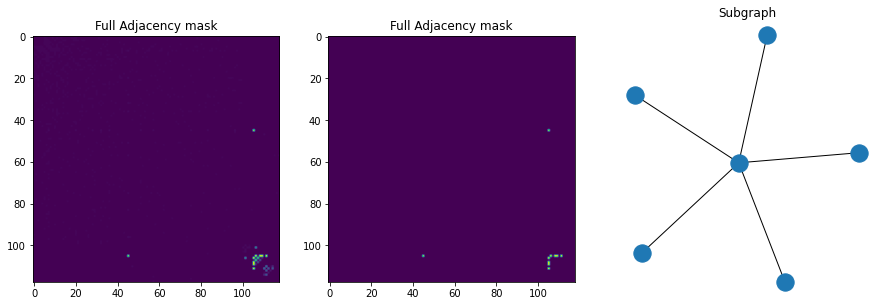

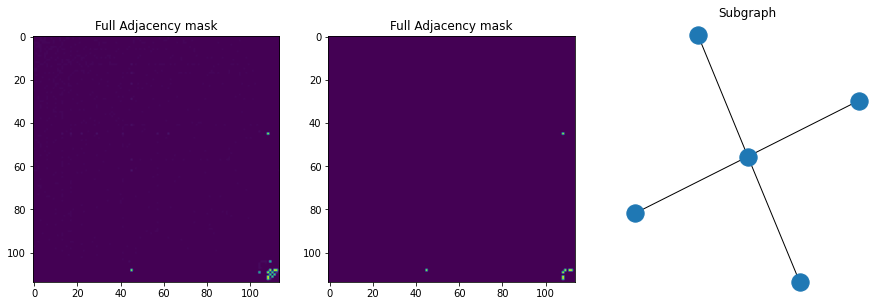

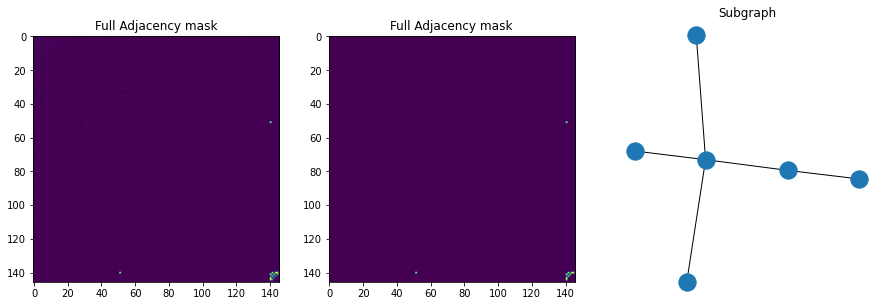

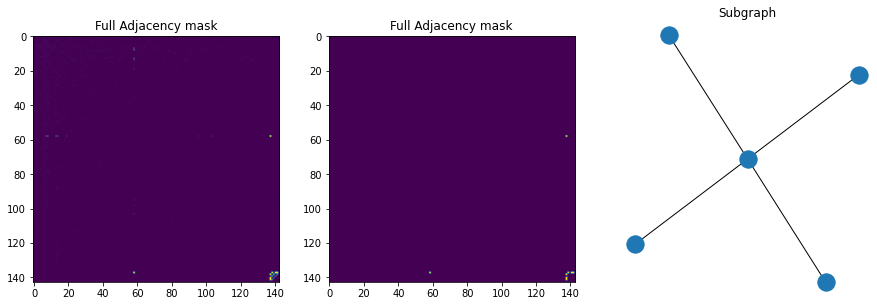

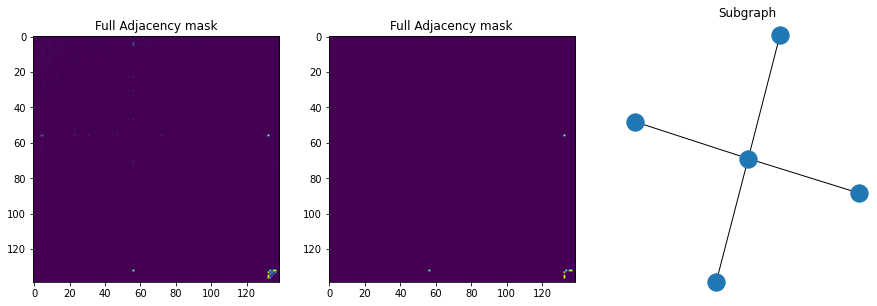

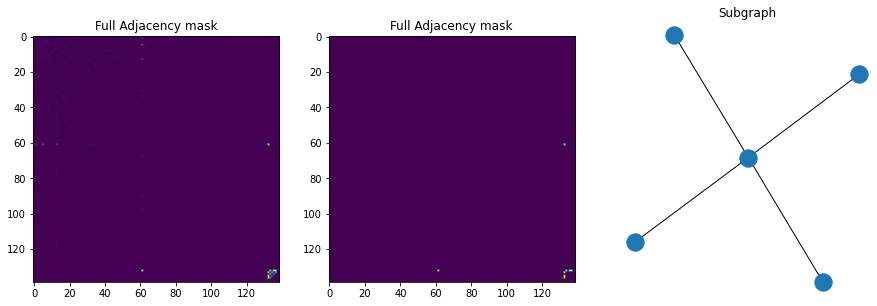

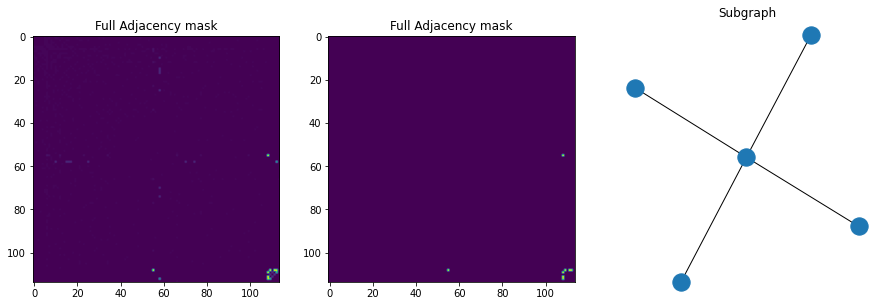

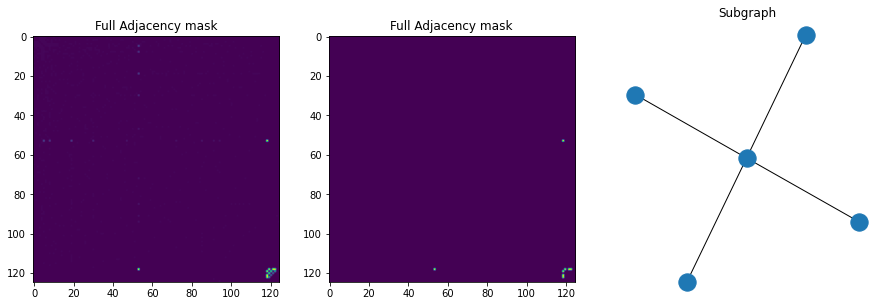

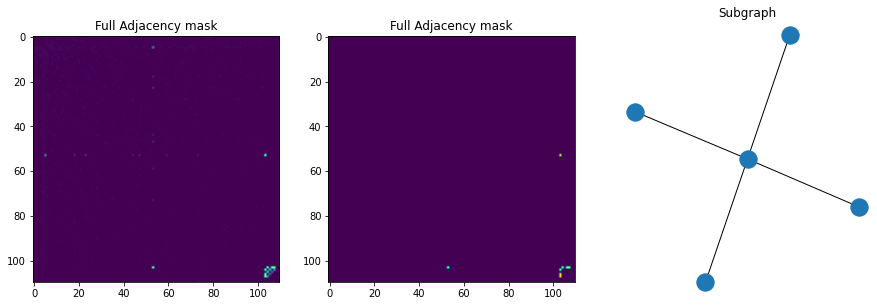

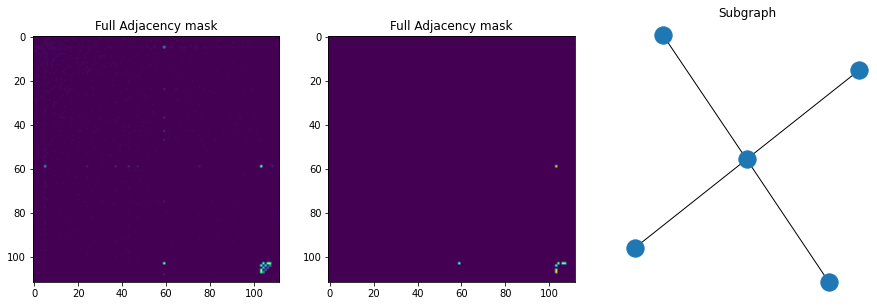

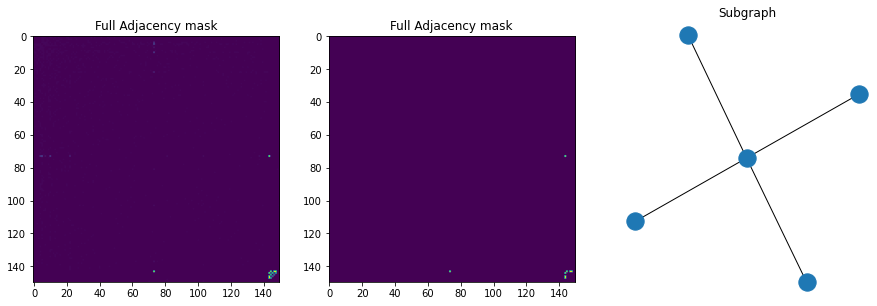

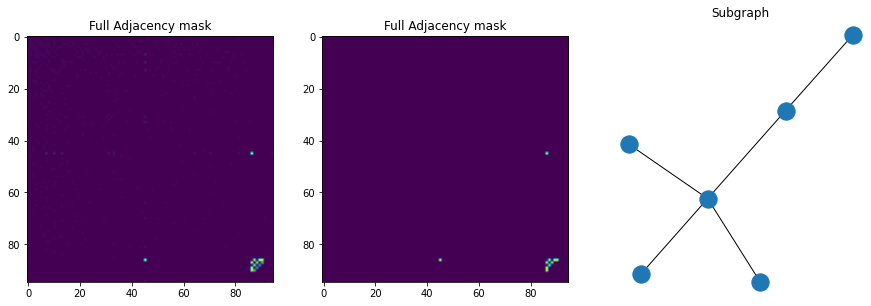

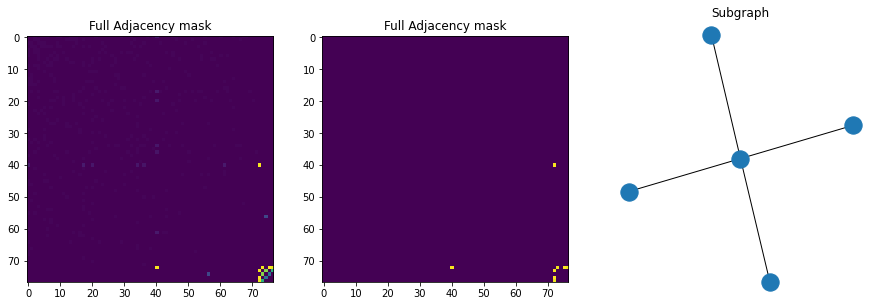

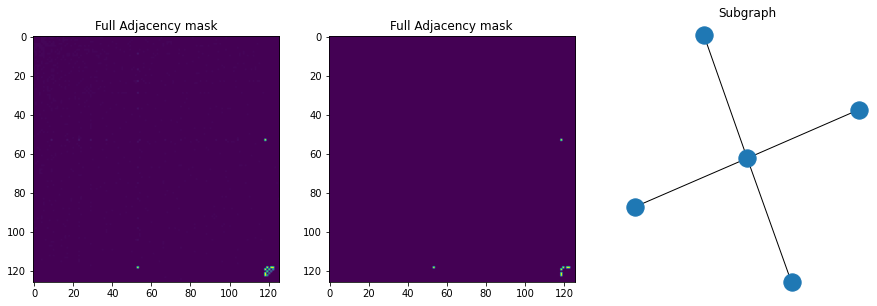

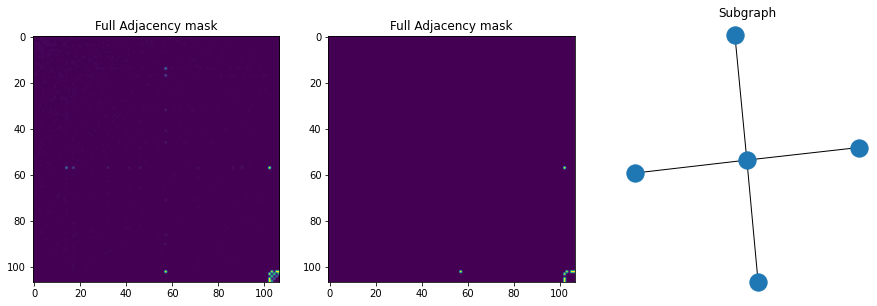

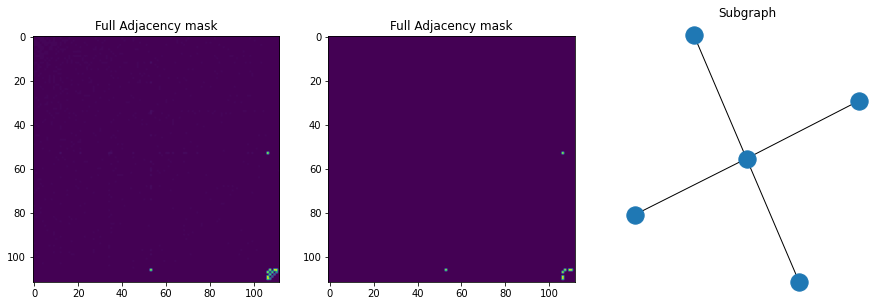

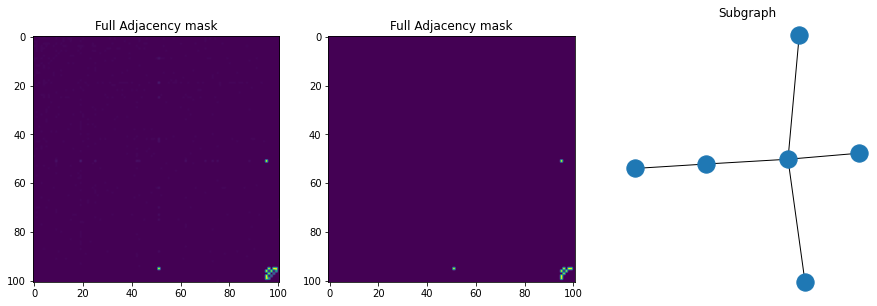

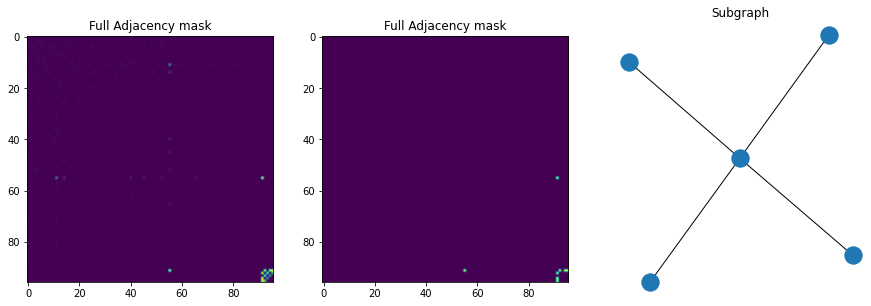

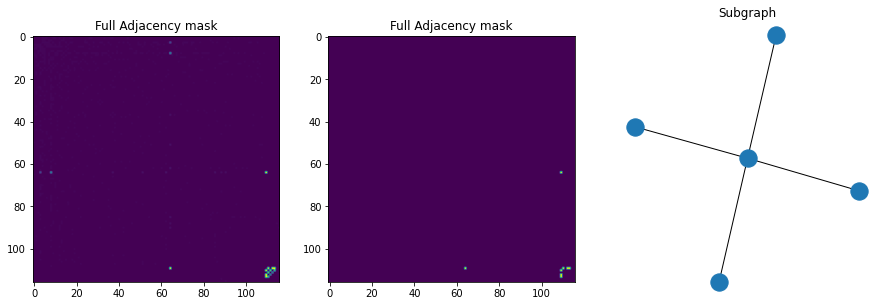

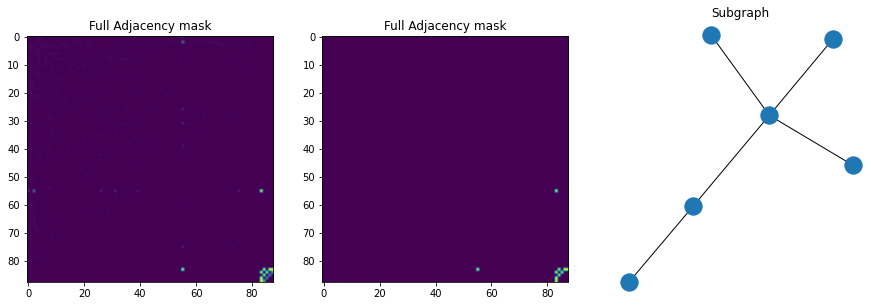

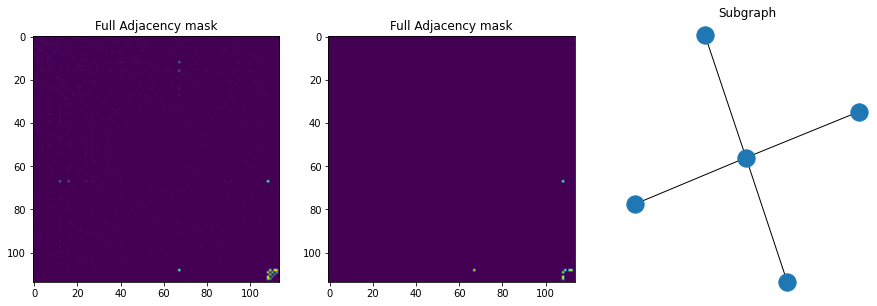

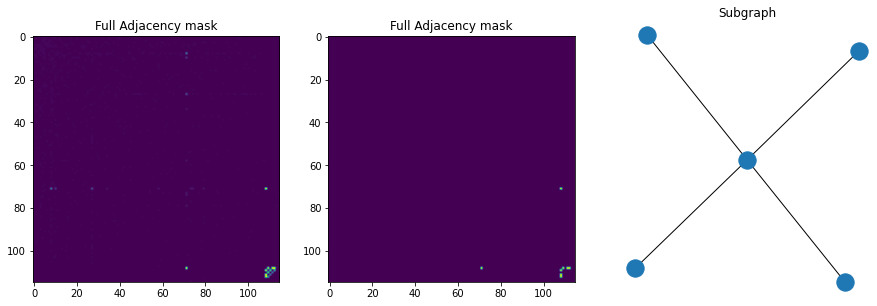

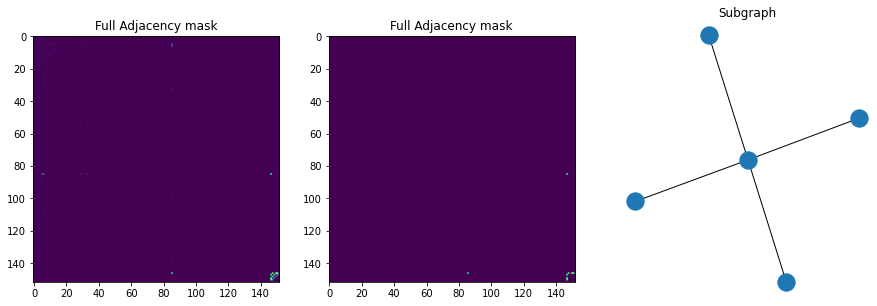

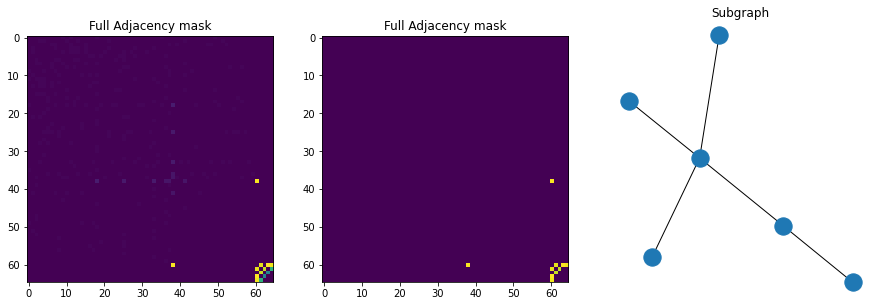

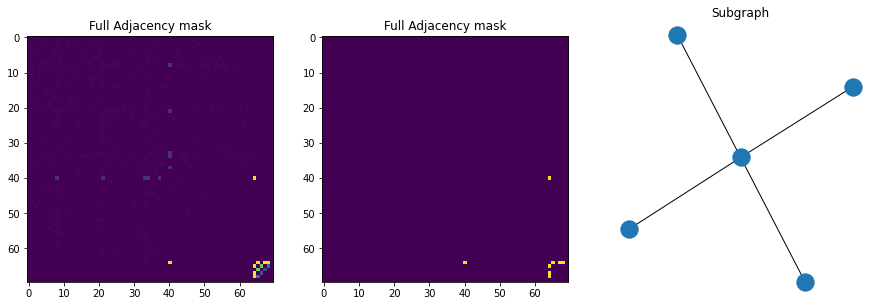

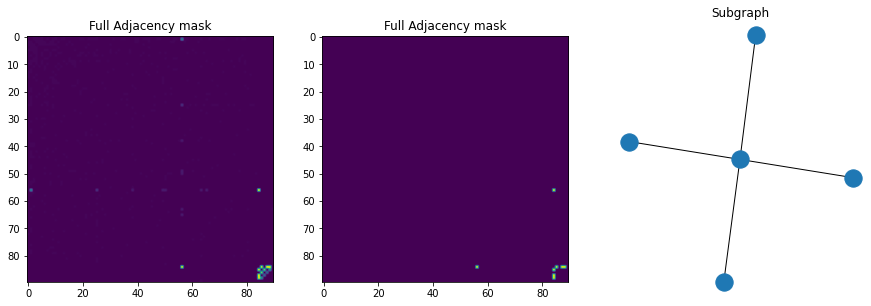

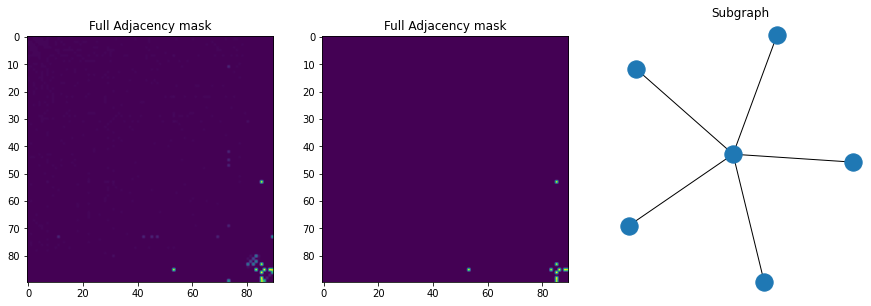

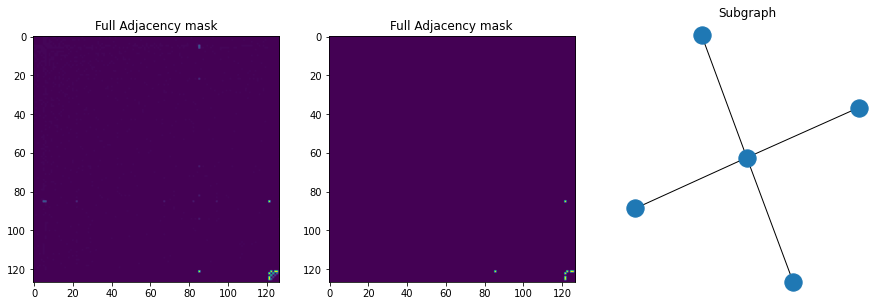

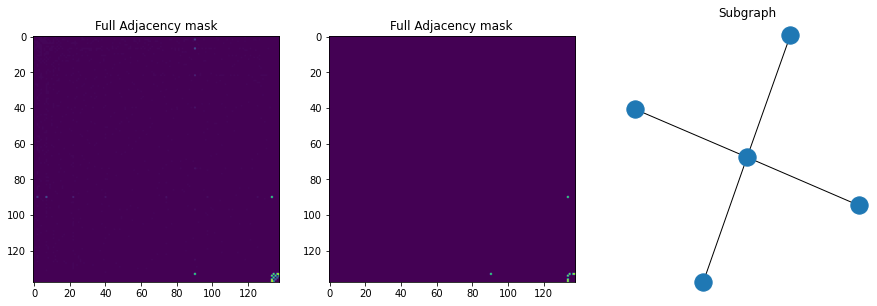

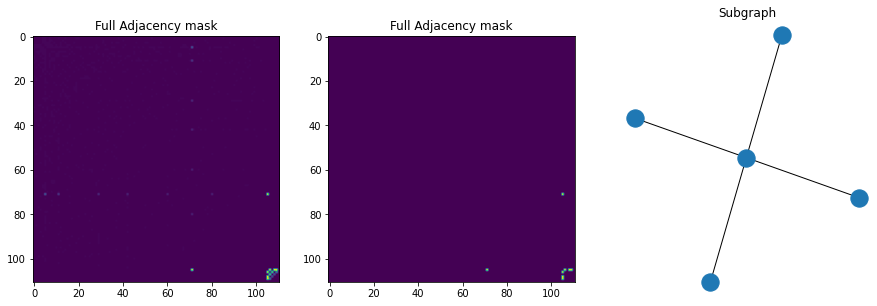

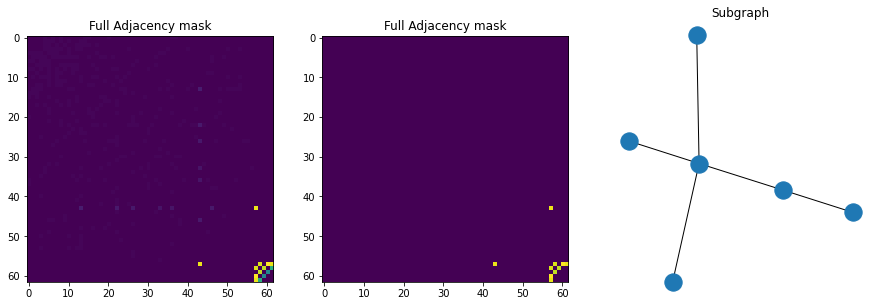

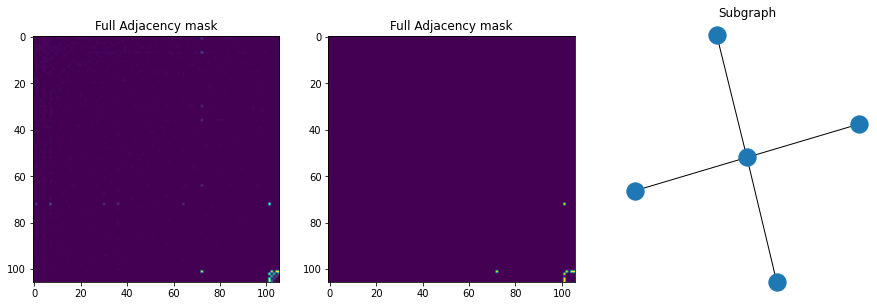

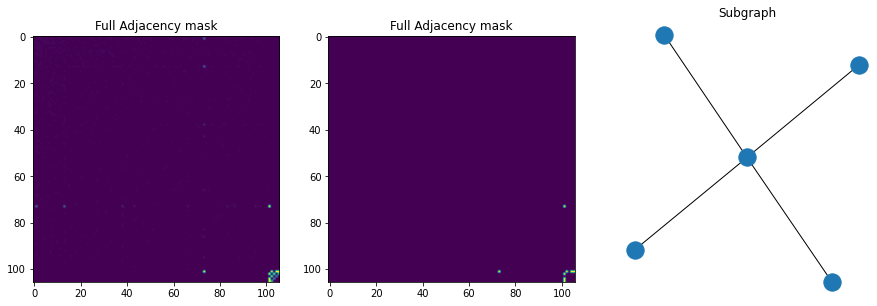

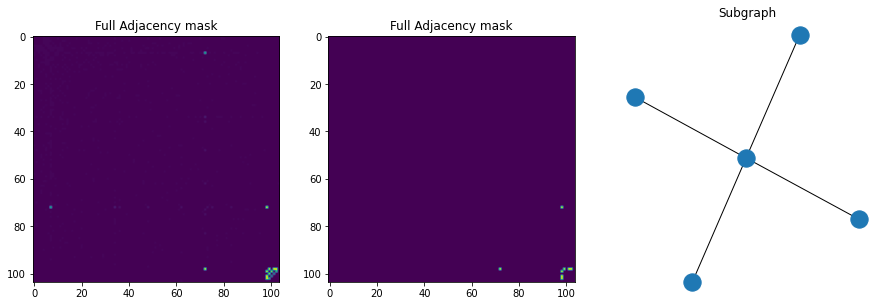

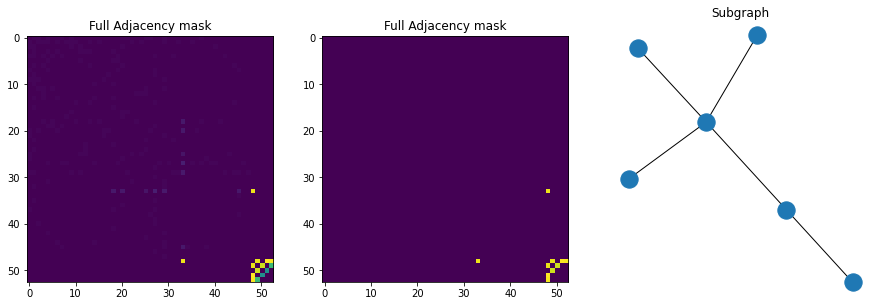

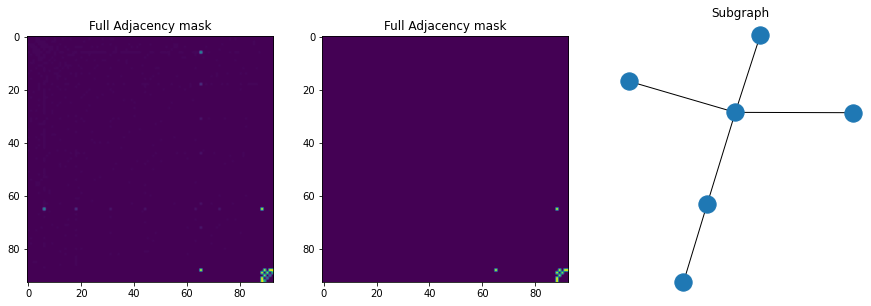

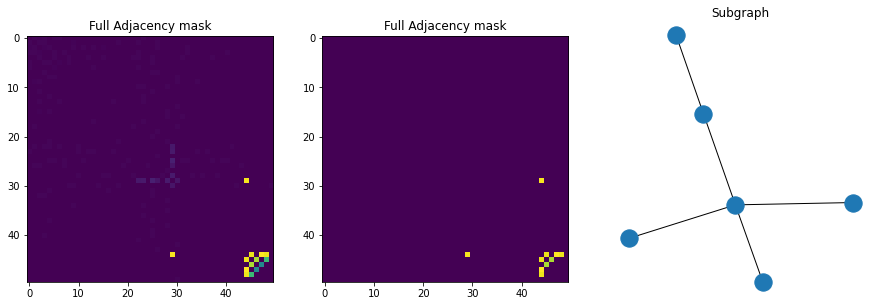

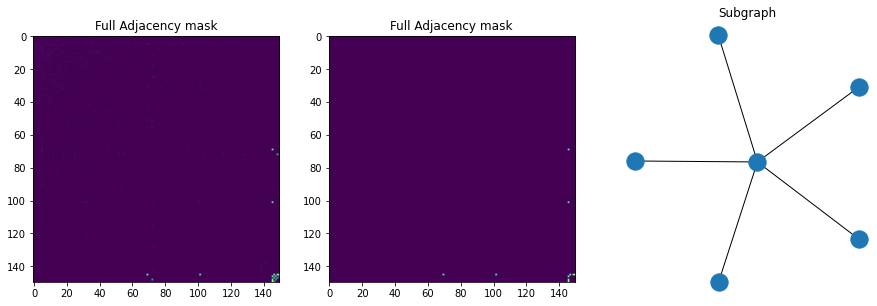

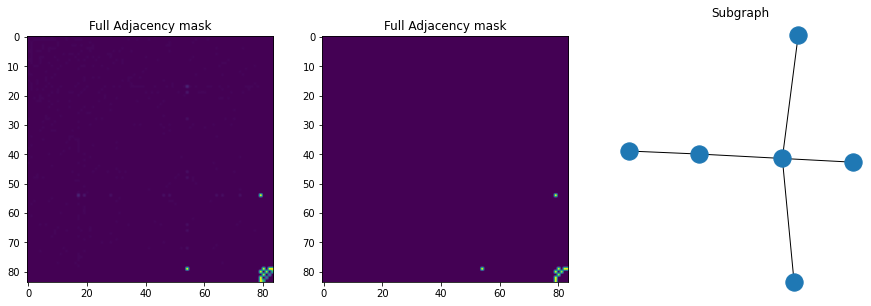

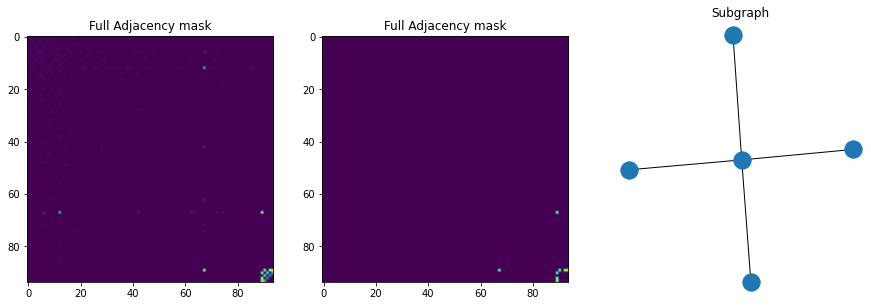

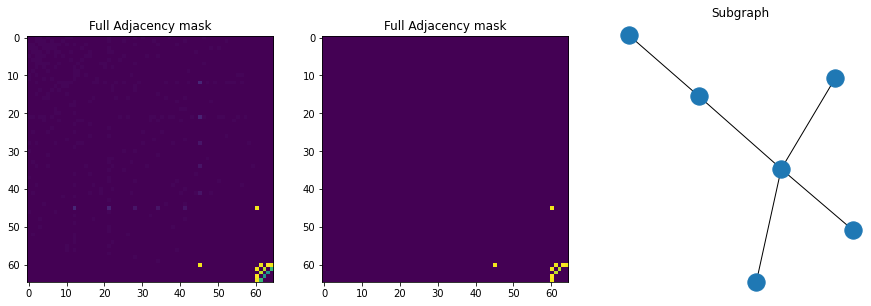

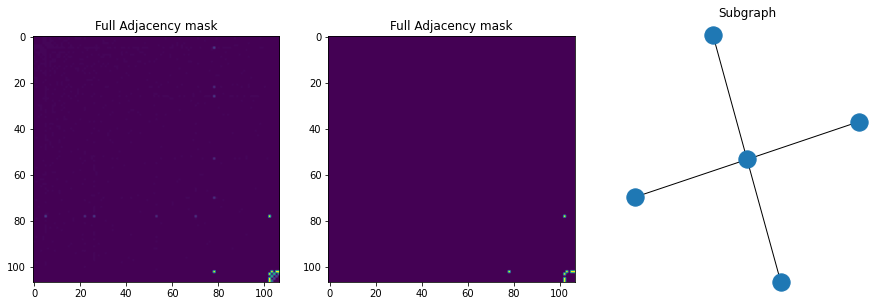

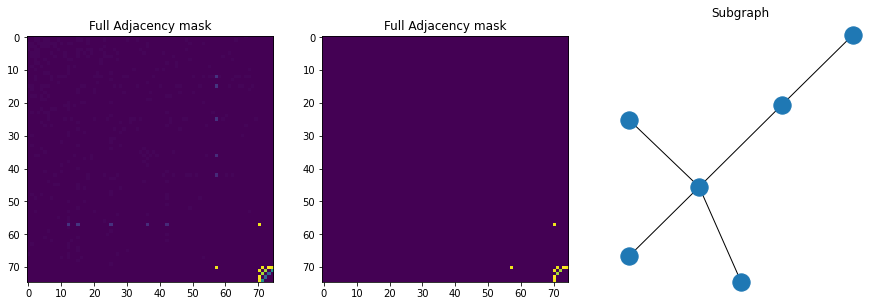

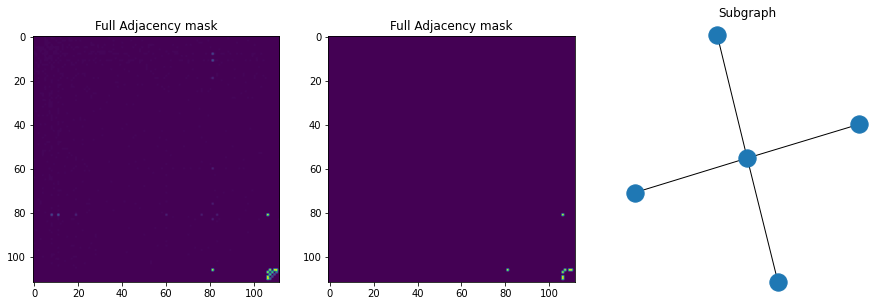

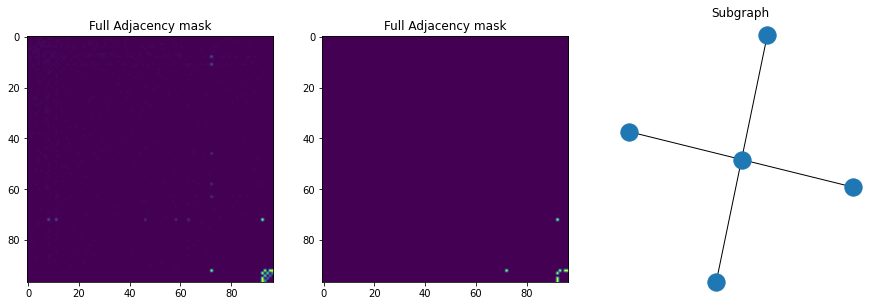

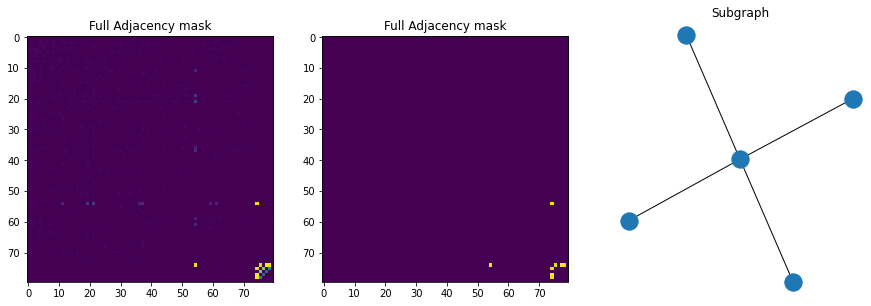

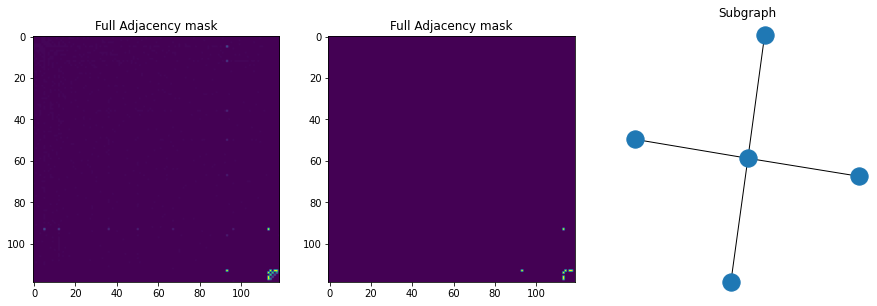

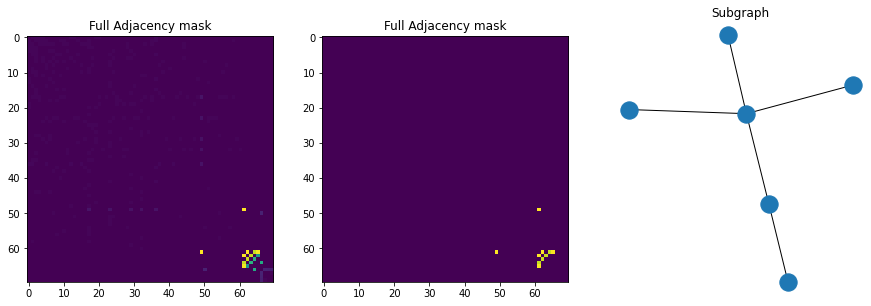

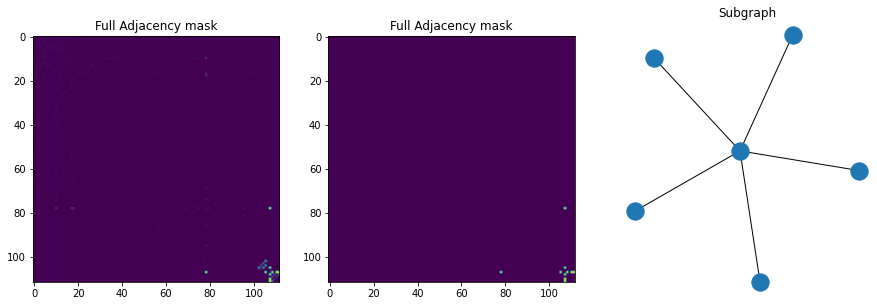

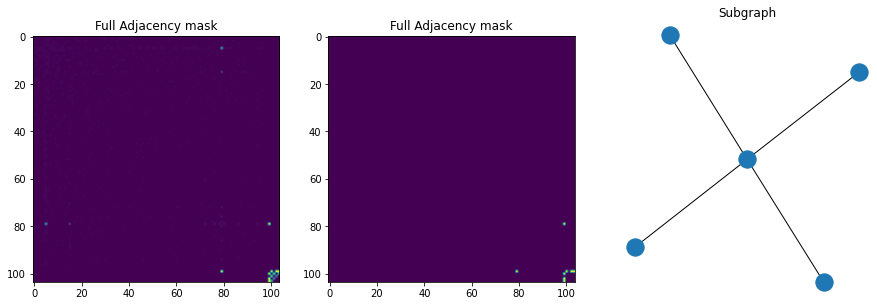

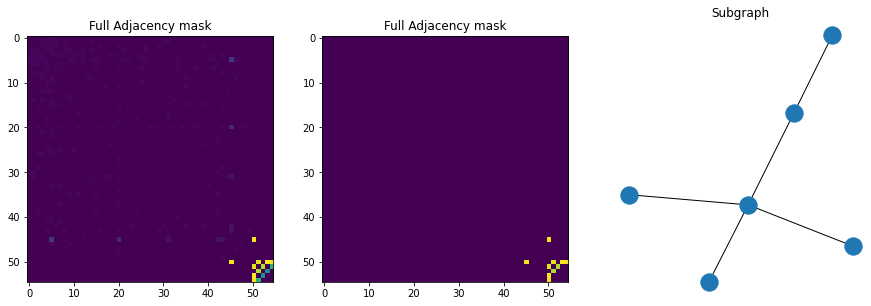

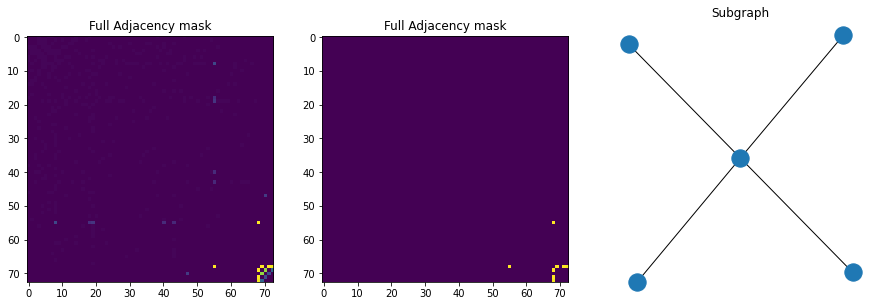

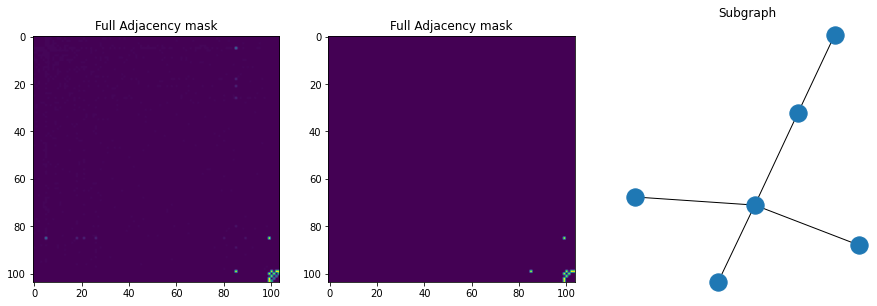

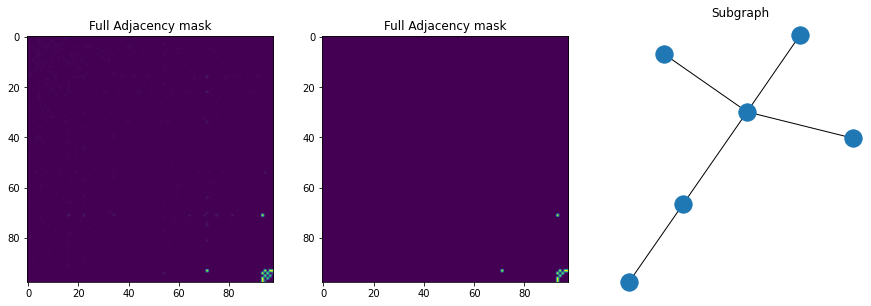

In [8]:
for m in masks: 

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    plt.title(str(m))
    
    # Full adjacency
    ax1.set_title('Full Adjacency mask')
    adj = show_adjacency_full(m, ax=ax1)
    
    # Filtered adjacency
    f = filter_adj(adj)
    ax2.set_title('Full Adjacency mask')
    ax2.imshow(f);
    
    # Plot subgraph
    ax3.set_title("Subgraph")
    G = nx.from_numpy_array(f)
    G.remove_nodes_from(list(nx.isolates(G)))
    nx.draw(G, ax=ax3)